In [129]:
import numpy as np
import pandas as pd
from itertools import product
import csv
import numpy as np
 
start_value1= 5e-06
end_value1 = 7e-04 

start_value2 = 2e-7
end_value2 = 9e-7

# Compute Error
column_header =['particle_diameter_1', 'particle_diameter_2']
interval_1 = (end_value1-start_value1)/20
print(interval_1)
error_K_1 = interval_1**2/150*(0.001)/(1-0.1)**2
print('error_K_1 =', error_K_1)
interval_2 = (end_value2-start_value2)/20
print(interval_2)  
error_K_2 = interval_2/1.75*0.001/(1-0.1)
print('error K_2 =', error_K_2)


# Create an array
array1 = np.linspace(start_value1, end_value1, 20)
array2 = np.linspace(start_value2, end_value2, 20)

# particle_diameter_2 = list(array2)
# data_frame = pd.DataFrame(columns = particle_diameter_2)
# print(data_frame)



combinations = list(product(array1, array2))

 
# Create a DataFrame using pandas
df = pd.DataFrame(combinations, columns=column_header)

# Save the DataFrame to a CSV file
csv_file_path = 'combinations.csv'
df.to_csv(csv_file_path, index=False)

print(df)



3.475e-05
error_K_1 = 9.93878600823045e-15
3.4999999999999996e-08
error K_2 = 2.222222222222222e-11
     particle_diameter_1  particle_diameter_2
0               0.000005         2.000000e-07
1               0.000005         2.368421e-07
2               0.000005         2.736842e-07
3               0.000005         3.105263e-07
4               0.000005         3.473684e-07
..                   ...                  ...
395             0.000700         7.526316e-07
396             0.000700         7.894737e-07
397             0.000700         8.263158e-07
398             0.000700         8.631579e-07
399             0.000700         9.000000e-07

[400 rows x 2 columns]


In [130]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

path = 'stochastic_tools_out.json'
data20 = pd.read_csv('CT1.csv')

# to open the JSON file in read mode, assign it to the variable file and convert into a pyhton data structure (dictionary)
with open(path, 'r') as file: 
  data_json = json.load(file)


# to extract the samples dictionary from data_json and convert it into a DataFrame
data_label = data_json['time_steps'][-1]['samples'] 
parameters_study = pd.DataFrame(data_label)
parameters_study.columns = ['particle_diameter_1', 'particle_diameter_2']


raw_data = data_json['time_steps'][-1]['results']
df = pd.DataFrame(raw_data)
df.columns = ['inlet-p', 'outlet-p','time','converged']
df

p_in = df['inlet-p'][:].tolist()
t = df['time'][:].tolist()

 
# The first element of the list t is selected and ordered vertically
t_header = np.stack(t[0],axis=0)
# A DataFrame is created, composed by all the inlet pressure values at each time-step 
md_df = pd.DataFrame(data = p_in)
md_df = md_df.T
md_df *= 1e-6
md_df = md_df.drop(503)
md_df = md_df.drop(502)
md_df = md_df.drop(501)

# Define the name of the column to be used as the new index
new_index_column = t_header

# Set the new index using the specified column
md_df.set_index(new_index_column, inplace=True)
print('Modeling Results')
md_df


Modeling Results


,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0.0,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339,...,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339
0.1,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339,...,3.155651,36.038487,4.293339,4.293339,3.782071,4.293339,4.293339,4.293339,4.293339,4.293339
0.2,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339,...,4.287667,4.287453,4.275318,4.274806,4.286853,4.273843,4.273387,4.272948,4.272524,4.272113
0.3,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339,...,4.266251,4.265354,4.249211,4.248036,4.262884,4.245834,4.244799,4.243803,4.242845,4.241921
0.4,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339,...,4.238410,4.236723,4.217490,4.215591,4.232113,4.212045,4.210387,4.208796,4.207269,4.205801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49.6,4.201195,4.201102,4.201034,4.200982,4.200941,4.200908,4.200881,4.200858,4.200839,4.200822,...,0.101492,0.101481,0.101481,0.101481,0.101473,0.101503,0.101460,0.101503,0.101501,0.101470
49.7,4.200713,4.200620,4.200551,4.200499,4.200458,4.200425,4.200398,4.200375,4.200355,4.200338,...,0.101492,0.101481,0.101481,0.101481,0.101473,0.101503,0.101460,0.101503,0.101501,0.101470
49.8,4.200230,4.200137,4.200068,4.200016,4.199975,4.199942,4.199914,4.199891,4.199872,4.199855,...,0.101492,0.101481,0.101481,0.101481,0.101473,0.101503,0.101460,0.101503,0.101501,0.101470
49.9,4.199746,4.199653,4.199584,4.199532,4.199491,4.199458,4.199430,4.199407,4.199387,4.199370,...,0.101492,0.101481,0.101481,0.101481,0.101473,0.101503,0.101460,0.101503,0.101501,0.101470


(0.0, 5.0)

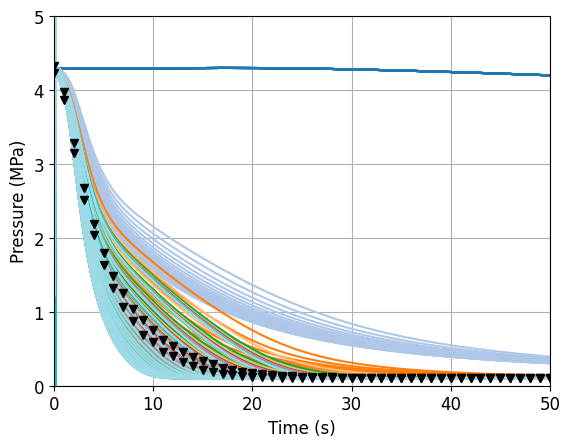

In [131]:
# Plot all pressure decays
ax = md_df.plot(colormap='tab20', legend=False)
plt.plot(data20['time'], data20['CT1_600_1']/1e6, color = 'k', marker = 'v', linestyle = '')
plt.plot(data20['time'], data20['CT1_600_2']/1e6, color = 'k', marker = 'v', linestyle = '')
ax.tick_params(axis='both', labelsize=12)  
plt.xlabel('Time (s)', fontsize = 12)
plt.ylabel('Pressure (MPa)', fontsize = 12)
plt.grid()
plt.xlim(0, 50)
plt.ylim(0, 5)



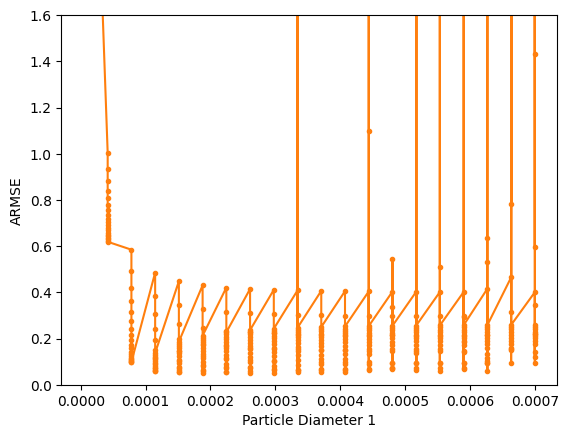

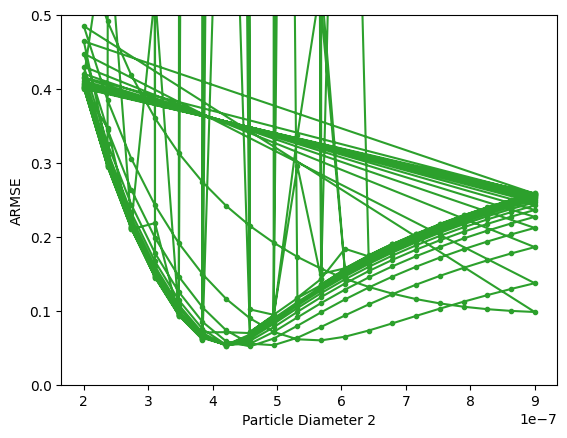

Minimum ARMSE 1: 0.05188407887417544
K_1 =  2.90571457884461e-13
K_2 =  2.9072681704260653e-10
particle_diameter_1 =  0.0001878947368421
particle_diameter_2 =  4.5789473684210523e-07


In [132]:


# Function to compute Absolute Root Mean Square Error (ARMSE) 
def compute_armse(y_values, experimental_y_values):
    absolute_error = np.abs(y_values - experimental_y_values)
    squared_error = absolute_error**2
    mean_squared_error = np.mean(squared_error)
    armse = np.sqrt(mean_squared_error)
    return armse

ARMSE = []

for i in range(md_df.shape[1]): 
    pressure = md_df.iloc[:, i]  # Select column using numerical index
    y_values = pressure.values
    x_values = np.linspace(0, 50, 501)
    experimental_y_values = np.interp(x_values, data20['time'], data20['CT1_600_1']/1e6)
    range_of_observed_values = np.max(experimental_y_values) - np.min(experimental_y_values)
    armse = compute_armse(y_values, experimental_y_values)
    narmse = compute_armse(y_values, experimental_y_values)/range_of_observed_values*100
    # Append the value to the NumPy array
    ARMSE = np.append(ARMSE, armse) 

parameters = pd.read_csv('combinations.csv')

plt.plot(parameters['particle_diameter_1'], ARMSE, marker = '.', color= 'C1', linestyle = '-')
plt.xlabel('Particle Diameter 1')
plt.ylabel('ARMSE')
plt.ylim(0, 1.6)
plt.show()

plt.plot(parameters['particle_diameter_2'], ARMSE, marker = '.', color = 'C2', linestyle = '-')
plt.xlabel('Particle Diameter 2')
plt.ylabel('ARMSE')
plt.ylim(0, 0.5)
plt.show()

minimum_ARMSE = min(ARMSE)
print('Minimum ARMSE 1: ' + str(minimum_ARMSE))
min_index_1 = np.argmin(ARMSE)
selected_row = parameters.iloc[min_index_1]
K_1 = selected_row['particle_diameter_1']**2/150*0.001/(1-0.1)**2
print("K_1 = ", K_1)
K_2 = selected_row['particle_diameter_2']/1.75*0.001/(1-0.1)
print("K_2 = ", K_2)


print("particle_diameter_1 = ", selected_row['particle_diameter_1'])
print("particle_diameter_2 = ", selected_row['particle_diameter_2'])

     particle_diameter_1  particle_diameter_2     ARMSE
0               0.000005         2.000000e-07  3.819498
1               0.000005         2.368421e-07  3.819459
2               0.000005         2.736842e-07  3.819431
3               0.000005         3.105263e-07  3.819409
4               0.000005         3.473684e-07  3.819392
..                   ...                  ...       ...
395             0.000700         7.526316e-07  0.297569
396             0.000700         7.894737e-07  0.309218
397             0.000700         8.263158e-07  0.319872
398             0.000700         8.631579e-07  0.329673
399             0.000700         9.000000e-07  0.338715

[400 rows x 3 columns]


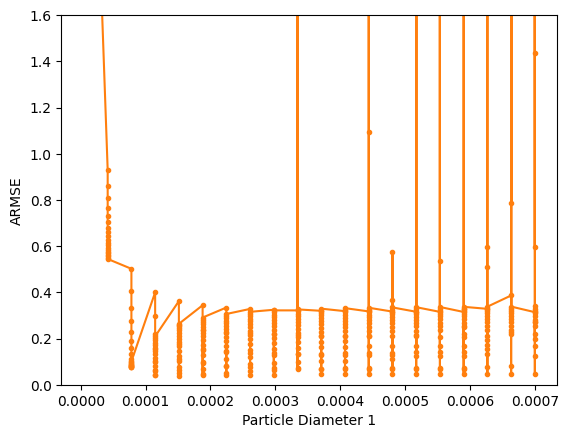

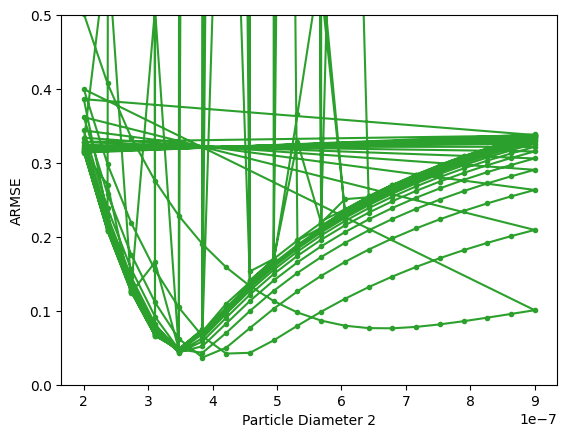

Minimum ARMSE: 0.03682302374922555
K_1 =  2.90571457884461e-13
K_2 =  2.9072681704260653e-10
particle_diameter_1 =  0.0001878947368421
particle_diameter_2 =  4.5789473684210523e-07


In [133]:
# Function to compute Absolute Root Mean Square Error (ARMSE) 
def compute_armse(y_values, experimental_y_values):
    absolute_error = np.abs(y_values - experimental_y_values)
    squared_error = absolute_error**2
    mean_squared_error = np.mean(squared_error)
    armse = np.sqrt(mean_squared_error)
    return armse

ARMSE = []

for i in range(md_df.shape[1]):
    pressure = md_df.iloc[:, i]  # Select column using numerical index
    y_values = pressure.values
    x_values = np.linspace(0, 50, 501)
    experimental_y_values = np.interp(x_values, data20['time'], data20['CT1_600_2']/1e6)
    range_of_observed_values = np.max(experimental_y_values) - np.min(experimental_y_values)
    armse = compute_armse(y_values, experimental_y_values)
    narmse = compute_armse(y_values, experimental_y_values)/range_of_observed_values*100
    # Append the value to the NumPy array
    ARMSE = np.append(ARMSE, armse) 


parameters = pd.read_csv('combinations.csv')
parameters['ARMSE'] = ARMSE

print(parameters)

plt.plot(parameters['particle_diameter_1'], ARMSE, marker = '.', color= 'C1', linestyle = '-')
plt.xlabel('Particle Diameter 1')
plt.ylabel('ARMSE')
plt.ylim(0, 1.6)
plt.show()

plt.plot(parameters['particle_diameter_2'], ARMSE, marker = '.', color = 'C2', linestyle = '-')
plt.xlabel('Particle Diameter 2')
plt.ylabel('ARMSE')
plt.ylim(0, 0.5)
plt.show()


minimum_ARMSE = min(ARMSE)
print('Minimum ARMSE: ' + str(minimum_ARMSE))
min_index_2 = np.argmin(ARMSE)
selected_row = parameters.iloc[min_index_1]
K_1 = selected_row['particle_diameter_1']**2/150*0.001/(1-0.1)**2
print("K_1 = ", K_1)
K_2 = selected_row['particle_diameter_2']/1.75*0.001/(1-0.1)
print("K_2 = ", K_2)

print("particle_diameter_1 = ", selected_row['particle_diameter_1'])
print("particle_diameter_2 = ", selected_row['particle_diameter_2'])

(0.0, 5.0)

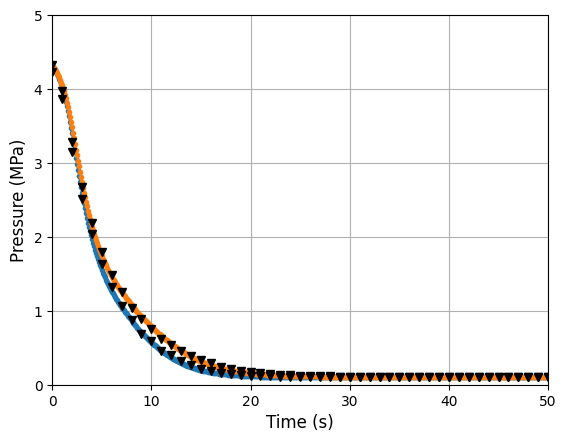

In [134]:
# Plot all pressure decays
md_df[min_index_1].plot(marker = '.')
md_df[min_index_2].plot(marker = '.')
plt.plot(data20['time'], data20['CT1_600_1']/1e6, color = 'k', marker = 'v', linestyle = '')
plt.plot(data20['time'], data20['CT1_600_2']/1e6, color = 'k', marker = 'v', linestyle = '')
ax.tick_params(axis='both', labelsize=12)  
plt.xlabel('Time (s)', fontsize = 12)
plt.ylabel('Pressure (MPa)', fontsize = 12)
plt.grid()
plt.xlim(0, 50)
plt.ylim(0, 5)
